In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
last_layers.keys()

dict_keys(['70m', '410m', '1b', '1.4b', '2.8b'])

In [ ]:
# Looking at the last layer representation for each model sizes

In [81]:
corr_result=pd.read_csv('task_id_corr.csv')
last_layers = {}
for model_size in corr_result['model_size'].unique():
    last_layer = corr_result[corr_result['model_size']==model_size]['layer_num'].max()
    last_layers[model_size] = last_layer

plot_result = {'corrcoef':[], 'model_size': [], 'task': []}
for i, (m,l) in enumerate(last_layers.items()):
    cond = (~corr_result['task'].str.contains('crows')) & (~corr_result['task'].str.contains('wsc')) \
        & (~corr_result['task'].str.contains('hendrycks')) \
            & (corr_result['model_size'] == m) \
        & (corr_result['n_words_correlated']==1) \
            & (corr_result['method']=='2nn') \
                & (corr_result['layer_num']==l)
    plot_result['corrcoef'].extend(list(corr_result[cond]['corrcoef'].values))
    plot_result['model_size'].extend(list(corr_result[cond]['model_size'].values))
    plot_result['task'].extend([t.split('-')[0] for t in list(corr_result[cond]['task'].values)])

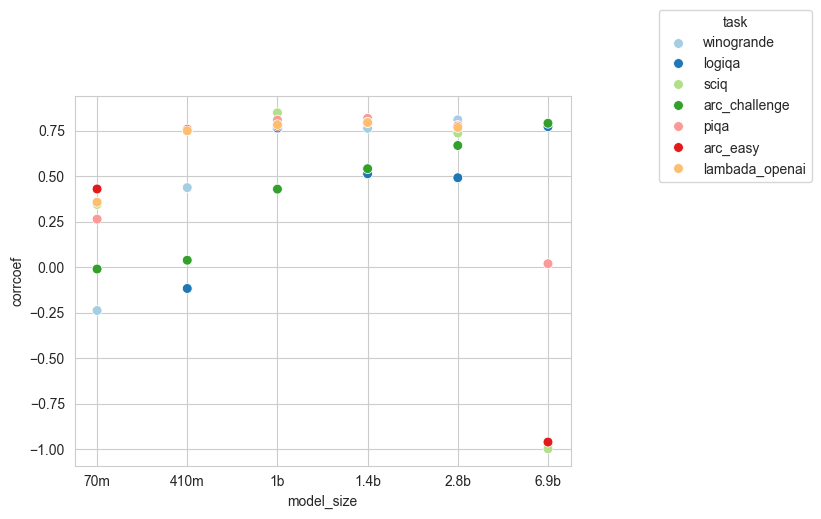

In [82]:
ax= sns.scatterplot(plot_result, x = 'model_size', y = 'corrcoef', hue='task', palette = 'Paired', s=50, )
sns.move_legend(ax, loc = 'center right', bbox_to_anchor=(1.5, 1))

In [83]:
## Fix the model size and plot over layer

last_layers = {}
for model_size in corr_result['model_size'].unique():
    last_layer = corr_result[corr_result['model_size']==model_size]['layer_num'].max()
    last_layers[model_size] = last_layer

plot_result = {m: {'corrcoef':[], 'task': [], 'layer_num': []} for m in last_layers.keys()}
for i, (m,l) in enumerate(last_layers.items()):
    cond = (~corr_result['task'].str.contains('crows')) & (~corr_result['task'].str.contains('wsc')) \
        & (~corr_result['task'].str.contains('hendrycks')) \
            & (corr_result['model_size'] == m) \
        & (corr_result['n_words_correlated']==1) \
            & (corr_result['method']=='2nn')
    plot_result[m]['corrcoef'].extend(list(corr_result[cond]['corrcoef'].values))
    plot_result[m]['layer_num'].extend(list(corr_result[cond]['layer_num'].values))
    plot_result[m]['task'].extend([t.split('-')[0] for t in list(corr_result[cond]['task'].values)])

/tmp/ipykernel_2067781/2302141820.py:2: UserWarning: 
The markers list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax= sns.lineplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', style = 'task', palette = 'Paired', markers='o')


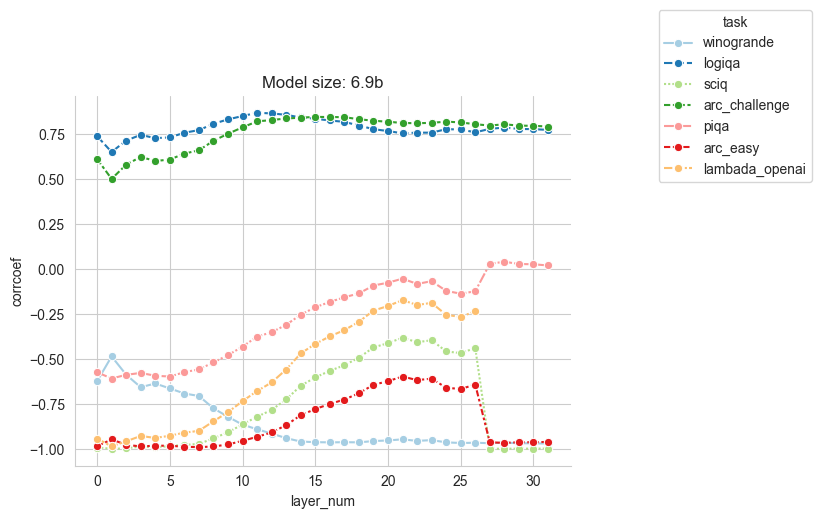

In [84]:
m = '6.9b'
ax= sns.lineplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', style = 'task', palette = 'Paired', markers='o')

ax.set_title(f'Model size: {m}')
sns.move_legend(ax, loc = 'center right', bbox_to_anchor=(1.5, 1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

/tmp/ipykernel_2067781/799315389.py:4: UserWarning: 
The markers list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax= sns.lineplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', style = 'task', palette = 'Paired', markers='o', dashes = False)


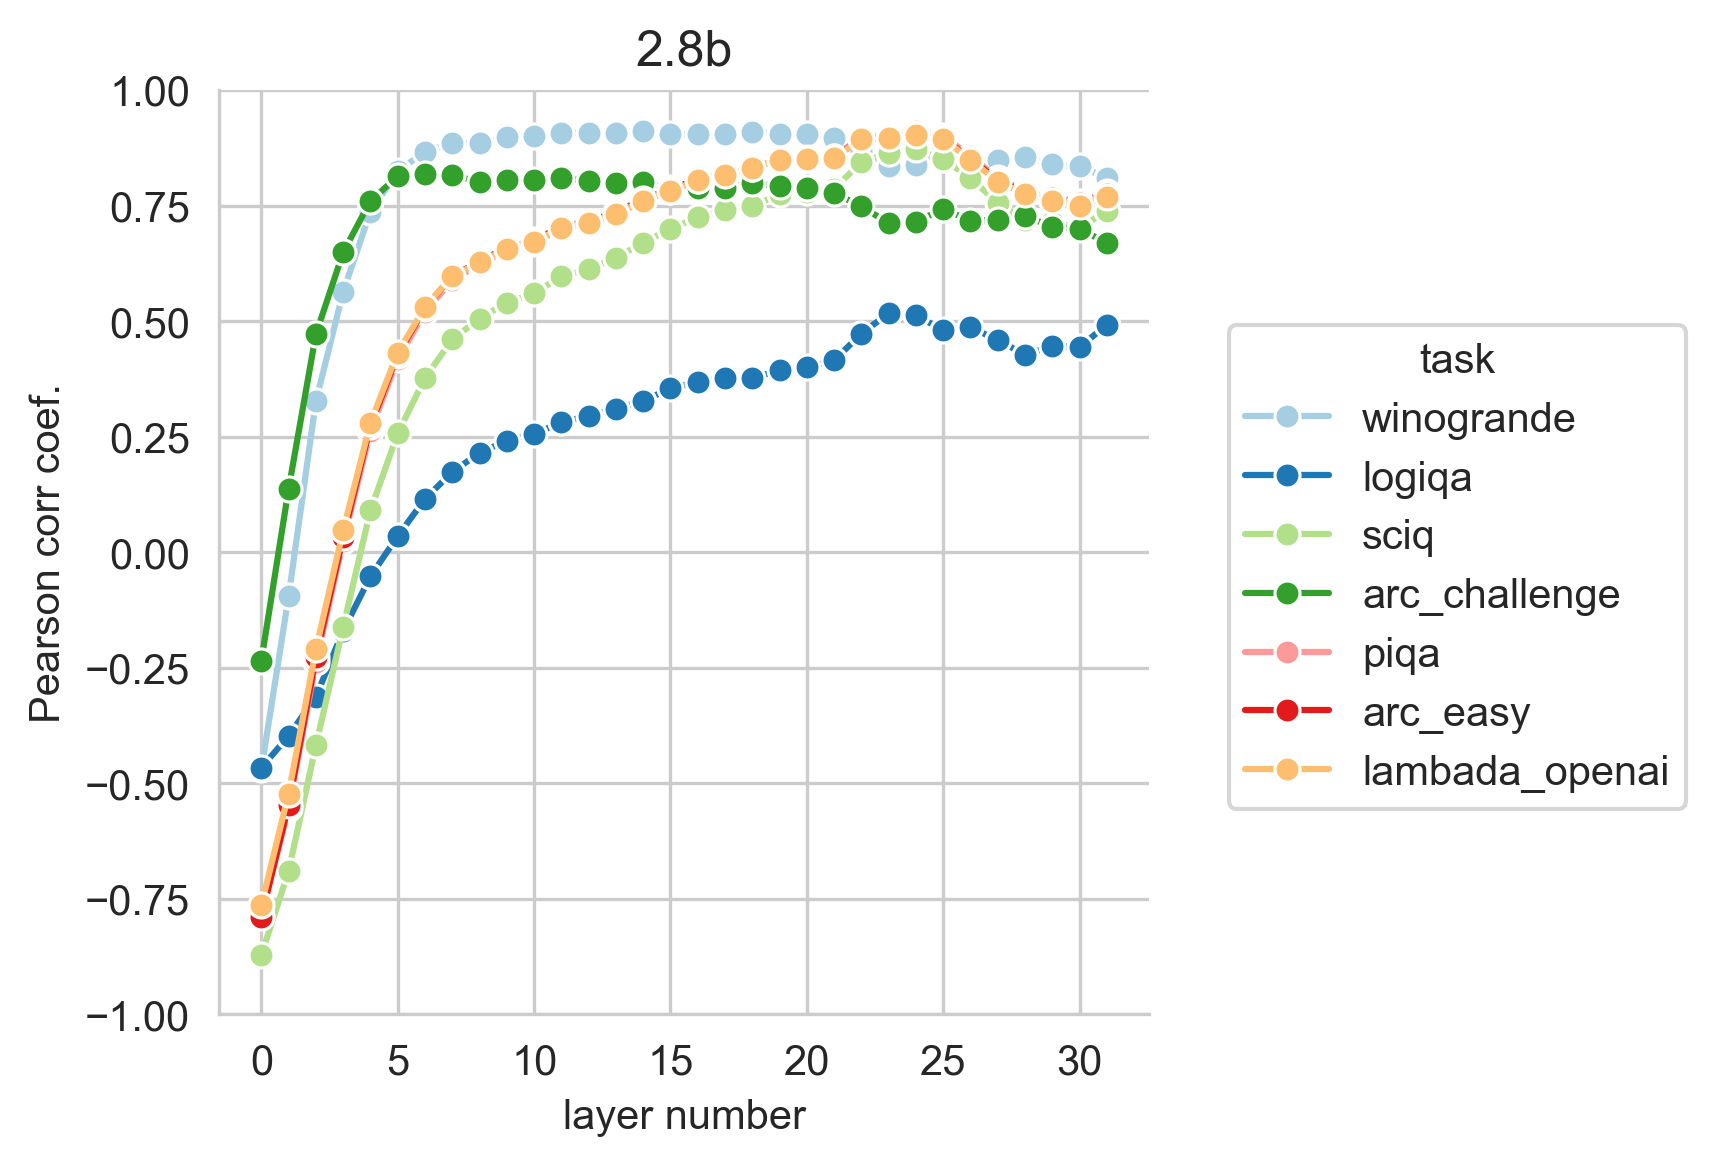

In [86]:
m = '2.8b'
sns.set_style("whitegrid")
fig = plt.figure(figsize= (4,4), dpi = 300)
ax= sns.lineplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', style = 'task', palette = 'Paired', markers='o', dashes = False)

ax.set_title(f'{m}')
ax.set_ylim(-1,1)
ax.set_ylabel('Pearson corr coef.')
ax.set_xlabel('layer number')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.move_legend(ax, loc = 'lower right', bbox_to_anchor = (1.6,0.2))
fig.savefig(f'./results/task_corr/{m}_2nn.pdf')


/tmp/ipykernel_2067781/224199247.py:4: UserWarning: 
The markers list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax= sns.lineplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', style = 'task', palette = 'Paired', markers='o', dashes = False)


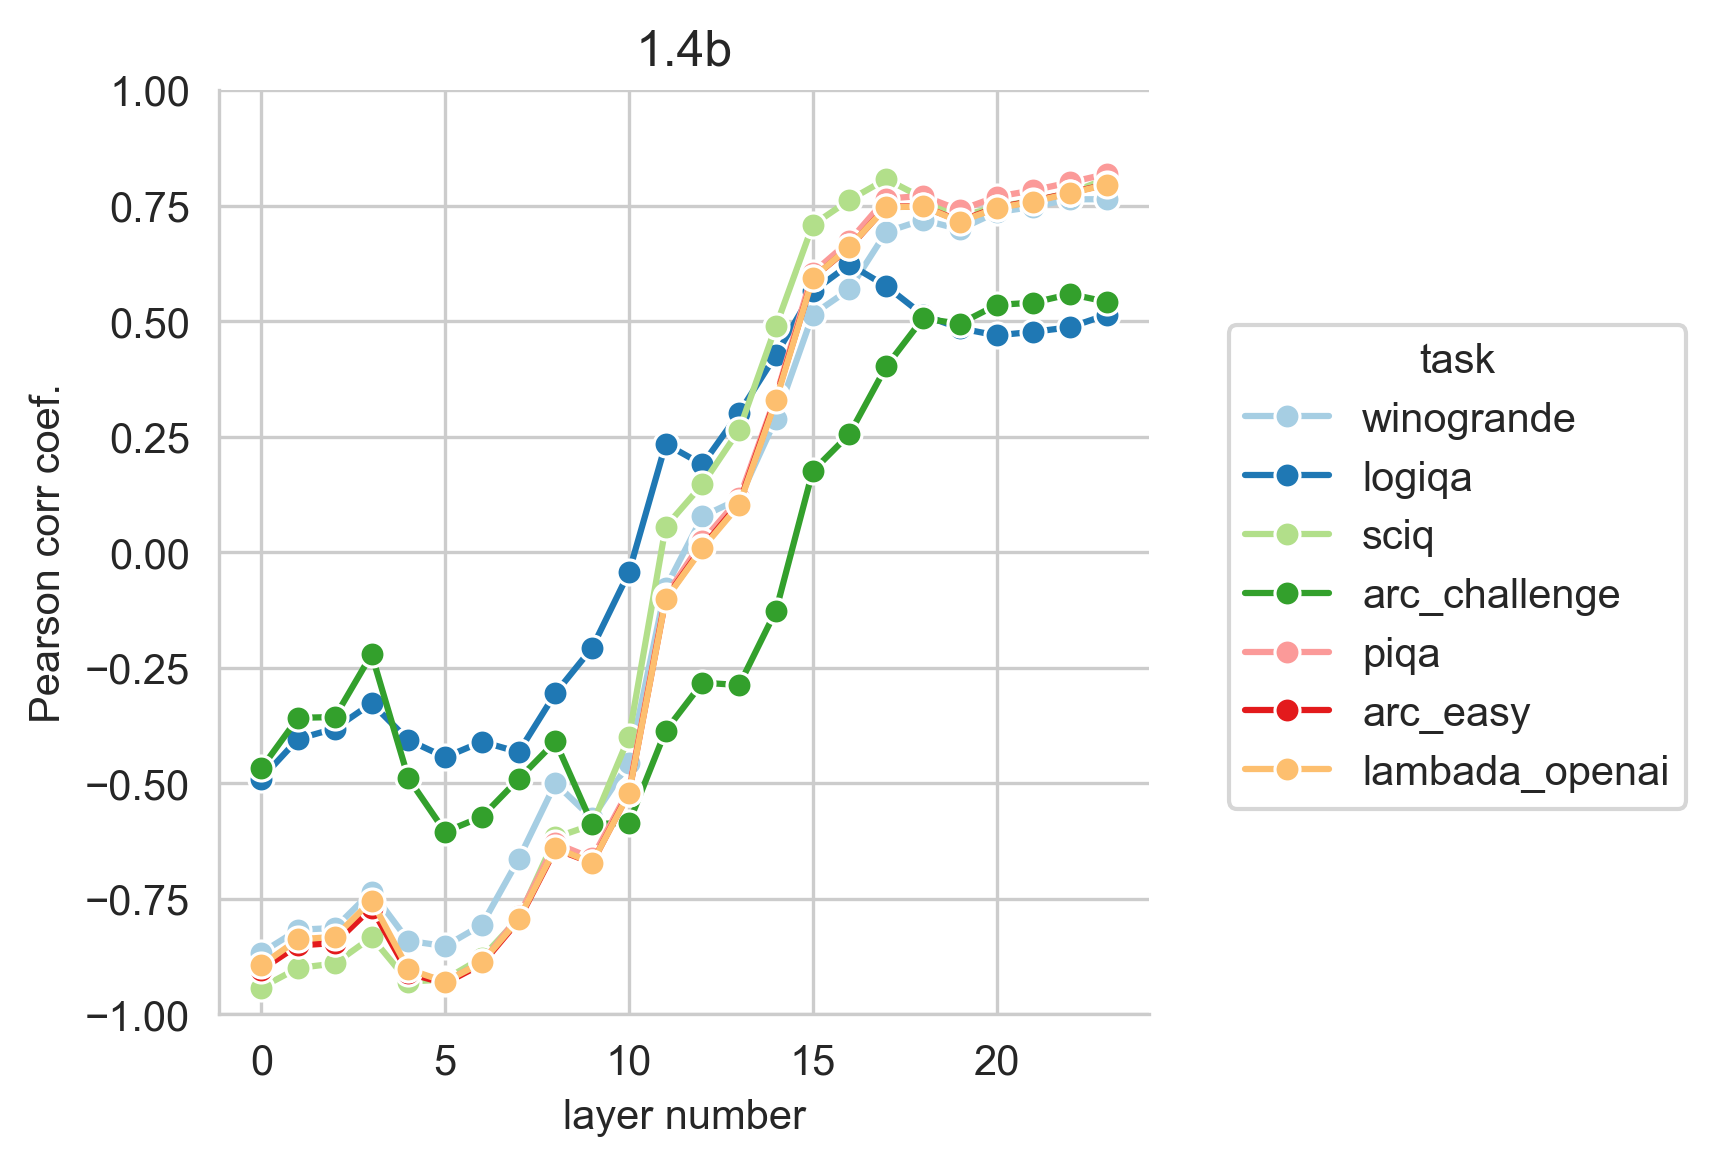

In [87]:
m = '1.4b'
sns.set_style("whitegrid")
fig = plt.figure(figsize= (4,4), dpi = 300)
ax= sns.lineplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', style = 'task', palette = 'Paired', markers='o', dashes = False)

ax.set_title(f'{m}')
ax.set_ylim(-1,1)
ax.set_ylabel('Pearson corr coef.')
ax.set_xlabel('layer number')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.move_legend(ax, loc = 'lower right', bbox_to_anchor = (1.6,0.2))
fig.savefig(f'./results/task_corr/{m}_2nn.pdf')

/tmp/ipykernel_2067781/2109701225.py:4: UserWarning: 
The markers list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax= sns.lineplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', style = 'task', palette = 'Paired', markers='o', dashes = False)


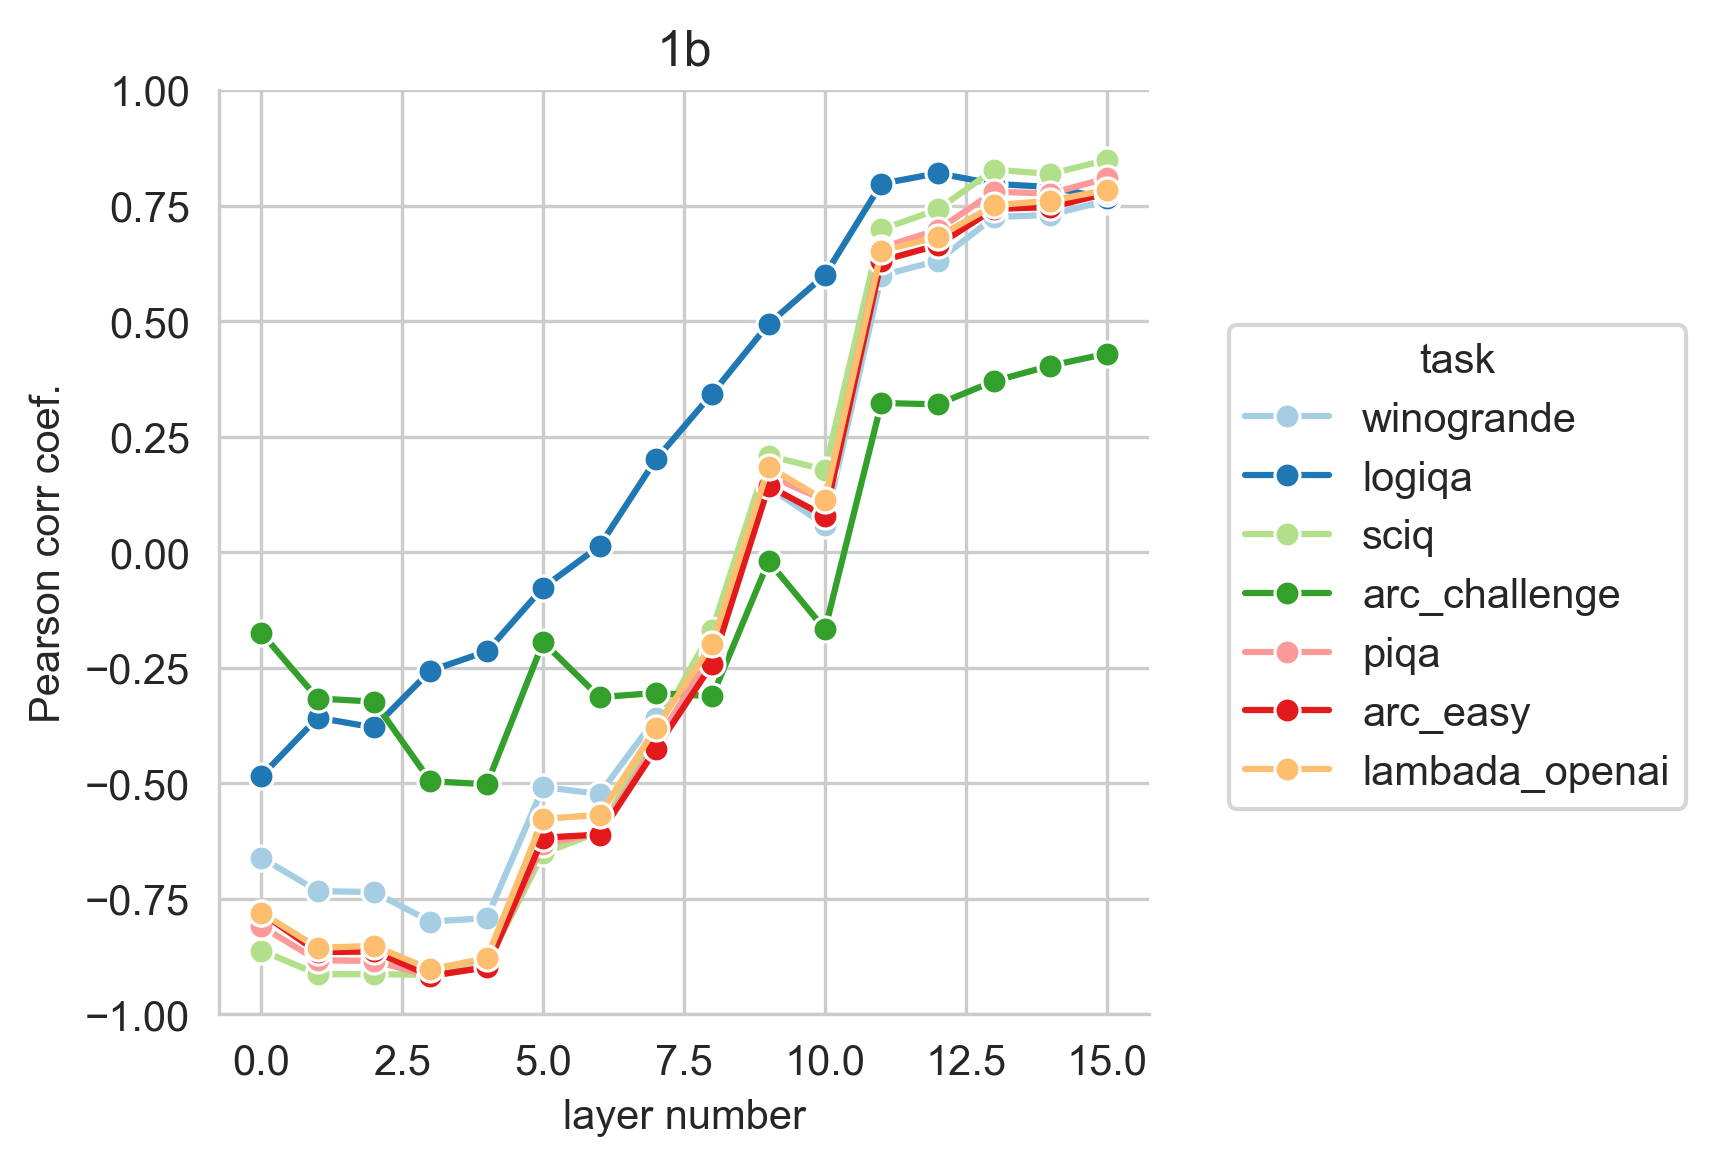

In [88]:
m = '1b'
sns.set_style("whitegrid")
fig = plt.figure(figsize= (4,4), dpi = 300)
ax= sns.lineplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', style = 'task', palette = 'Paired', markers='o', dashes = False)

ax.set_title(f'{m}')
ax.set_ylim(-1,1)
ax.set_ylabel('Pearson corr coef.')
ax.set_xlabel('layer number')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.move_legend(ax, loc = 'lower right', bbox_to_anchor = (1.6,0.2))
fig.savefig(f'./results/task_corr/{m}_2nn.pdf')

/tmp/ipykernel_2067781/3846162888.py:4: UserWarning: 
The markers list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax= sns.lineplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', style = 'task', palette = 'Paired', markers='o', dashes = False)


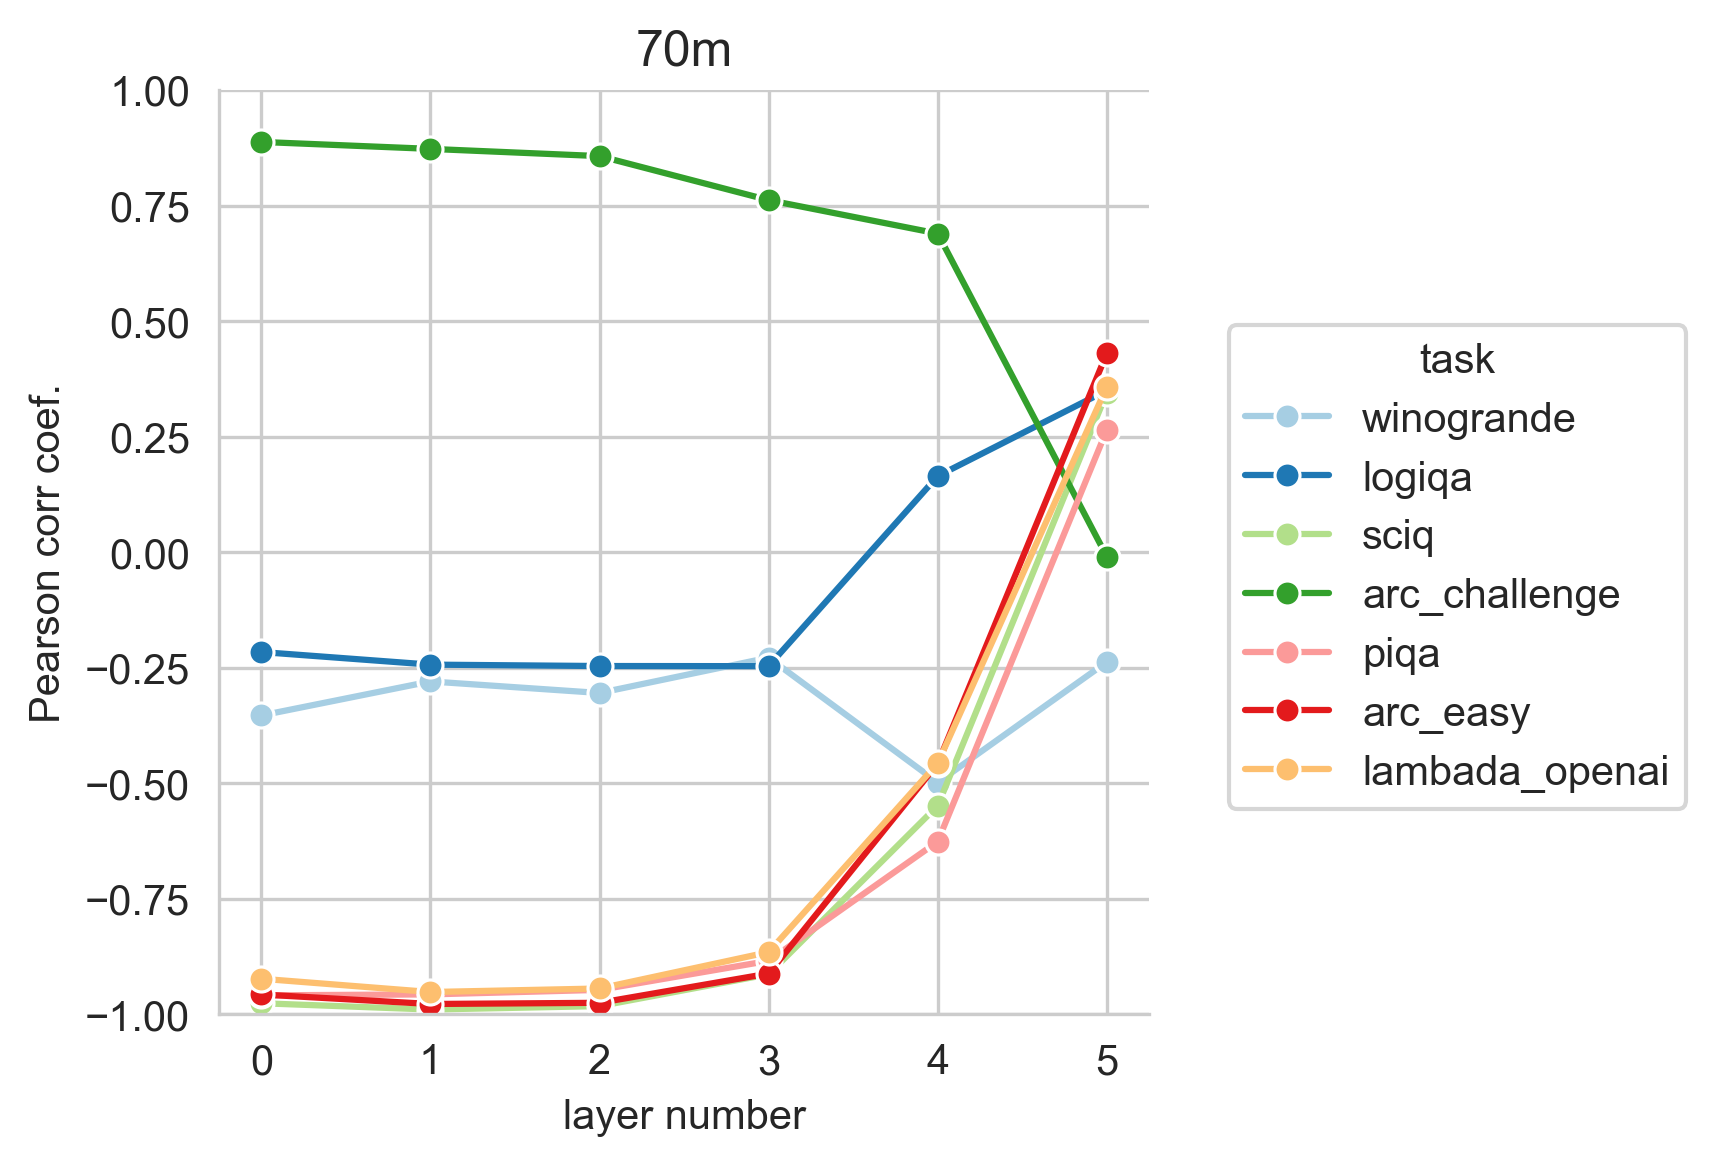

In [90]:
m = '70m'
sns.set_style("whitegrid")
fig = plt.figure(figsize= (4,4), dpi = 300)
ax= sns.lineplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', style = 'task', palette = 'Paired', markers='o', dashes = False)

ax.set_title(f'{m}')
ax.set_ylim(-1,1)
ax.set_ylabel('Pearson corr coef.')
ax.set_xlabel('layer number')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.move_legend(ax, loc = 'lower right', bbox_to_anchor = (1.6,0.2))
fig.savefig(f'./results/task_corr/{m}_2nn.pdf')